# ¡Hola, Sebastián!  

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

# ¡Llena ese carrito!

![Sample Image](https://gritdaily.com/wp-content/uploads/2021/01/Screen-Shot-2021-01-22-at-6.45.06-PM.png)

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

**Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.**

Para el paso 1 iniciare importando los datos con `pd.read_csv()`.

Posteriormente explorare con el método `info()` las características de cada una de las tablas para analisar sus columnas, que tipo de datos contienen, valores ausentes/duplicados.


In [1]:
# importar librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# uso el parametro sep = ";" en read_csv()

df_orders = pd.read_csv('/datasets/instacart_orders.csv', sep = ";")
df_products = pd.read_csv('/datasets/products.csv', sep = ";")
df_aisles = pd.read_csv('/datasets/aisles.csv', sep = ";")
df_departments = pd.read_csv('/datasets/departments.csv', sep = ";")
df_order_products = pd.read_csv('/datasets/order_products.csv', sep = ";")

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la importación de datos y de librerías.
</div>

In [3]:
# mostrar información del DataFrame
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

**Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.**

En total se cargaron 5 tablas, las cuales nos dan información valiosa en los siguientes campos:

**a. Ordenes en la app:** `df_orders` y `df_order_products` brindan informacion de los pedidos realizados y nos permiten conocer información sobre: 

1. El número de orden y usurario que la realizó.
2. Productos asociados a esa orden, en que orden se agregaron y si son recurrentes.
3. Dia y Hora en la cual se registró la orden, además de dias transcurridos desde la última orden.

**b. Productos de la app**: `df_products` indica los productos disponibles y sus características como:

1. Nombre e ID del producto.
2. Información sobre el pasillo y el departamento de cada producto.

**c. Pasillos**: `df_aisles` contiene los ID de pasillos y sus respectivos nombres.

**d. Departamentos**: `df_departments` contiene la lista de departamentos y sus respectivos nombres.



<P>Se puede notar que los ID son claves para poder relacionar las tablas si bien tenemos información valiosa, puede que sea necesario extraer información de la tabla `df_order_products` a `df_orders` si queremos conocer información sobre los productos.

Pudimos encontrar que las tablas `df_orders`, `df_products` y `df_order_products` tienen valores ausentes a tratar, luego se investigara si existen duplicados para todas las tablas.

También hay algunos valores en tipos float en `df_order_products`. y `df_orders` los cuales deben revisarse para confirmar si ese tipo de dato es válido para el análisis.



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Has hecho bien con esta exploración inicial de datos y la lectura de los problemas.
</div>

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Se hará una exploración de los datos tabla por tabla, en la cual se buscarán valores duplicados y/o ausentes. Según los resultados se explicará que impacto posible tienen los mismos en el análisis y por qué se eliminaron o mantuvieron según el caso.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
df_orders.duplicated().sum()                       # uso duplicated y sum en el dataframe.

15

In [9]:
 #filtro la tabla de orders por el método duplicated para poder investigar los duplicados.

df_orders[df_orders.duplicated()].head()  

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0


**¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?**

**Existen 15 líneas duplicadas para orders:** 

Según las definiciones de las columnas `'order_dow'` y `'order_hour_of_day'` ocurrieron en el mismo día y a la misma hora, esto indica que posiblemente ocurrió un incidente que causo que estos datos se duplicaran.


In [10]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.


# 'order_dow': día de la semana en que se hizo el pedido (0 si es domingo).
# filtro orders por dos condiciones: 1) dia de la semana = 3 y 2) hora = 2.

wed_orders = df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day']== 2)]
wed_orders.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 4838 to 477526
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                121 non-null    int64  
 1   user_id                 121 non-null    int64  
 2   order_number            121 non-null    int64  
 3   order_dow               121 non-null    int64  
 4   order_hour_of_day       121 non-null    int64  
 5   days_since_prior_order  114 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 6.6 KB


In [11]:
# uso isin para confirmar que todos los duplicados pertenecen al Miercoles a las 2:00

df_orders[df_orders.duplicated()]['order_id'].isin(wed_orders['order_id']).sum()

15

**¿Qué sugiere este resultado?**

El miércoles a las 2:00 se registraron 121 pedidos, de los cuales 15 son duplicados, esto sería un problema ya que trabajaríamos con valores mayores a los reales para este día lo cual podría guiarnos a conclusiones erróneas.

Visto que pudimos confirmar la procedencia y descubrir que los duplicados afectarían nuestras conclusiones, **es conveniente removerlos antes de continuar** con el análisis.

In [12]:
# Elimina los pedidos duplicados
df_orders = df_orders.drop_duplicates().reset_index(drop = True)   # Uso método drop_duplicates().

In [13]:
# Vuelve a verificar si hay filas duplicadas
df_orders.duplicated().sum()                                      # No hay duplicados en la tabla.

0

In [14]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos

df_orders['order_id'].duplicated().sum()              # No hay duplicados en la columna 'order_id'

0

**Describe brevemente tus hallazgos y lo que hiciste con ellos**

Se eliminaron los valores identificados, luego se verificó que no existan datos duplicados y que todos los valores en `'Order id'` son valores únicos.



### `products` data frame

In [15]:
# Verifica si hay filas totalmente duplicadas

df_products.duplicated().sum()                         # uso duplicated y sum en el dataframe.

0

In [16]:
# Revisa únicamente si hay ID de departamentos duplicados

df_products['department_id'].duplicated().sum()    #Uso duplicated y sum en la columna ['product_id'].

49673

In [17]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)


# uso str y lower en la columna 'product_name', luego uso duplicated y sum.
df_products['product_name'].str.lower().duplicated().sum()

1361

In [18]:
# Revisa si hay nombres duplicados de productos no faltantes

con1 = df_products['product_name'].str.lower().duplicated()    # uso la condición anterior.
con2 = df_products['product_name'].notna()                     # creo un condición de no ausente.

(con1 & con2).sum()                     # uso and y sum para encontrar los duplicados no ausentes. 


104

**Describe brevemente tus hallazgos y lo que hiciste con ellos.**

Primero se encontró que no hay líneas duplicadas en la tabla de productos, posteriormente se analizó solo la columna de `'product_name'` y se encontró que existen 1361 nombres de productos duplicados en la tabla, sin embargo, la mayoría eran valores ausentes que se excluyeron dejando como resultado **104 nombres de productos repetidos.**

Puede ocurrir que un mismo producto tenga códigos de `aisle_id` o `department_id` diferentes por lo cual esto explica que no haya filas duplicadas.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Gran trabajo!
</div>

### `departments` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
df_departments.duplicated().sum()

0

In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
df_departments['department_id'].duplicated().sum()

0

**Describe brevemente tus hallazgos y lo que hiciste con ellos.**

No hay valores duplicados para la tabla de departamentos.

### `aisles` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
df_aisles.duplicated().sum()

0

In [22]:
# Revisa únicamente si hay IDs duplicadas de productos
df_aisles['aisle_id'].duplicated().sum()

0

**Describe brevemente tus hallazgos y lo que hiciste con ellos.**

No hay duplicados para la informacion de los pasillos.

### `order_products` data frame

In [23]:
df_order_products.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1


In [24]:
# Revisa si hay filas totalmente duplicadas
df_order_products.duplicated().sum()                            # uso duplicated y sum.

0

In [25]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

# las columnas add_to_cart_order y reordered pueden tener valore duplicados que sean normales.
#'order_id' y 'product_id' no pueden existir más de una vez.

# uso duplicated con el parámetro (subset) con una lista de las columnas de ID solamente.

df_order_products.duplicated(subset= ['order_id','product_id']).sum()  

0

**Describe brevemente tus hallazgos y lo que hiciste con ellos.**

**La Tabla de `df_order_products` no tiene valores duplicados que afecten el análisis**, no se encontró que existieran filas donde los valores fueran igualas, en especial en las columnas 'order_id' y 'product_id' al mismo tiempo, lo que indica que no hay casos en los que las misma orden contenga los mismos productos.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [26]:
df_products.head(3)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7


In [27]:
# Encuentra los valores ausentes en la columna 'product_name'

df_products['product_name'].isna().sum()       # uso el método isna y sum.

1258

**Describe brevemente cuáles son tus hallazgos.**

Las columna `product_name` tiene 1258 valores ausentes

In [28]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

df_products[df_products['aisle_id']==100].isna().sum()  # filtro 'aisle_id'=100 y uso isna y sum.

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

los valores ausentes provienen del pasillo con ID = 100 

In [29]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

## filtro 'department_id'=21 y uso isna y sum

df_products[df_products['department_id']==21].isna().sum() 

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

Todos los valores austentes provienen del departamento con ID = 21

In [30]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

df_departments[df_departments['department_id']==21]  #uso un filtro para el departamento con ID 21.

,department_id,department
20,21,missing


In [31]:
df_aisles[df_aisles['aisle_id']==100]                #uso un filtro para el pasillo con ID 100.

,aisle_id,aisle
99,100,missing


**Tanto el departamento 21 como el pasillo 100 se usan para categorizar productos austentes**

In [32]:
# Completa los nombres de productos ausentes con 'Unknown'

df_products.fillna('Unknown', inplace = True)        # Uso el método fillna con 'Unknown'.
output = None

**Describe brevemente tus hallazgos y lo que hiciste con ellos.**

Se encontró que 1258 registros tenían valores ausentes para el nombre del producto, se investigó la procedencia de estos y se encontró que tenían el mismo pasillo y departamento. Tras revisar en las tablas de `df_departments` y `df_aisles` se confirmó que estos **se usan para categorizar los productos ausentes y se remplazaron con 'Unknown'** ya que no se pueden asignar a otro grupo.

### `orders` data frame

In [33]:
df_orders.head(3)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0


In [34]:
# Encuentra los valores ausentes
df_orders.isna().sum()                # Uso isna y sum. 

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [35]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

# filtro por 'order_number' == 1 y el valor coincide.

df_orders[df_orders['order_number']==1].count() 

order_id                  28817
user_id                   28817
order_number              28817
order_dow                 28817
order_hour_of_day         28817
days_since_prior_order        0
dtype: int64

**Describe brevemente tus hallazgos y lo que hiciste con ellos.**

**No hay valores ausentes que deban ser transformados**, `days_since_prior_order` contiene valores ausentes, pero estos pueden explicarse si es el primer pedido del usuario.

### `order_products` data frame

In [36]:
df_order_products.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1


In [37]:
# Encuentra los valores ausentes
df_order_products.isna().sum()                                      # uso el método isna y sum.

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [38]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?


print('min =', df_order_products['add_to_cart_order'].min())  # uso min() en la columna indicada.
print('max =', df_order_products['add_to_cart_order'].max())  # uso max() en la columna indicada.

min = 1.0
max = 64.0


**Describe brevemente cuáles son tus hallazgos.**

El valor mínimo por pedido debe ser 1 y máximo ha sido de 64 productos.

In [39]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'


# Creo id_missing para guardar todos los valores ausentes de la columna 'add_to_cart_order'.
id_missing = df_order_products[df_order_products['add_to_cart_order'].isna()]

# uso unique() para obtener una lista de los ID con valores ausentes.
print(id_missing['order_id'].unique())



[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [40]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.



# creo is_Na_64 con los order_id encontrados en el paso anterior
is_Na_64 = (df_order_products[df_order_products['order_id'].isin(id_missing['order_id'])])

# agrupo los datos por 'order_id' y uso count().sort_values() en la columna 'product_id'
is_Na_64.groupby(by = 'order_id')['product_id'].count().sort_values()


# puedo confirmar que son mayores a 64 productos

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64

**Describe brevemente cuáles son tus hallazgos.**

Los valores ausentes pertenecen a pedidos que tienen más de 64 productos

In [41]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

df_order_products['add_to_cart_order'].fillna(999, inplace = True)  # uso fillna() con 999.

#Uso as type para convertir la columna a 'int'.
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')

#confirmo con info() 
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


**Describe brevemente tus hallazgos y lo que hiciste con ellos.** 

Se remplazaron los valores de la columna `'add_to_cart_order'` por 999 ya que no se registra el orden luego de 64 productos, también se transformó a tipo entero.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Excelente trabajo en esta sección!
</div>

## Conclusiones

**Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos**

Se realizo un proceso exploratorio para cada tabla, en resumen:

**para los duplicados:**
1. Orders tenía 15 duplicados del miércoles a las 2:00 - **se eliminaron**
2. Products tiene 104 duplicados, hay códigos de aisle_id o department_id iguales - **se mantuvieron**
3. Order_products, Departamentos y aisles no tienen duplicados

**para los ausentes:**
1. Products tenía 1258 NA: según su ID de pasillo y departamento - **se remplazaron por 'Unknown'**
2. Orders tiene 28,817 NA: Corresponden a clientes que han comprado solo una vez - **se mantuvieron**
3. Order products 'add_to_cart_order' tenía 836 NA: ya que solo hay datos hasta 64 productos **se reemplazaron por 999** 


Teniendo en cuenta estas trasformaciones y que conocemos las tablas podemos empezar con nuestro análisis.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [42]:
# uso between para confirmar que los valores estan en el rango
# todos los valores estan entre 0 y 23

df_orders['order_hour_of_day'].between(0,23).unique() == True 

array([ True])

In [43]:
# todos los valores estan entre 0 y 6

df_orders['order_dow'].between(0,6).unique() == True  

array([ True])

**Escribe aquí tus conclusiones**: Los valores son razonables para ambas columnas

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

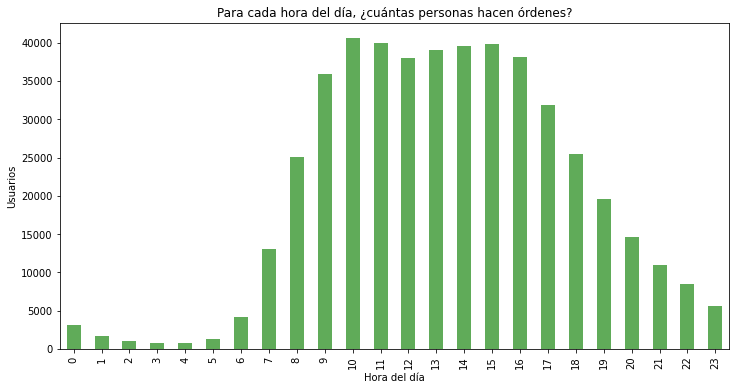

In [44]:
#definicion:'user_id': número de ID que identifica de manera única la cuenta de cada cliente.

# creo 'order_hours', agrupo por hora del dia la columna de user_id

order_hour = df_orders.groupby(by='order_hour_of_day')['user_id'].count()
order_hour.plot(kind='bar', 
                title= "Para cada hora del día, ¿cuántas personas hacen órdenes?",
                figsize=(12,6),
                xlabel = "Hora del día",
                ylabel = "Usuarios",
                color = "#60ab59"
               )
plt.show()

**Escribe aquí tus conclusiones**

1. Las personas **compran más durante las 9:00 y las 17:00**
2. La hora de **más ordenes es las 10:00**

### [A3] ¿Qué día de la semana compran víveres las personas?

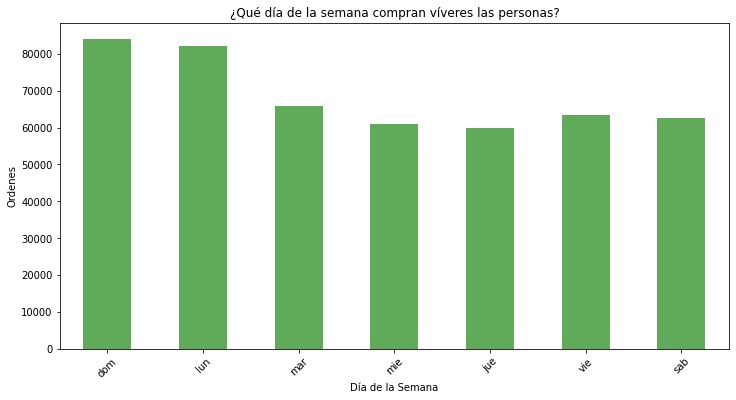

In [45]:
order_dow = df_orders.groupby(by='order_dow')['order_id'].count()      #Ordenes por día


#'order_dow': día de la semana en que se hizo el pedido (0 si es domingo).

x_axis = [0, 1, 2, 3, 4, 5, 6]                                         # valor diaa en numero
xlabels = ['dom', 'lun', 'mar', 'mie', 'jue', 'vie', 'sab']            # lista con dia en texto

# Crero un grafico de barras de ordenes por semana, y defino sus argumentos, tilulo, ejes..ect

order_dow.plot(kind='bar',
                title= "¿Qué día de la semana compran víveres las personas?",
                figsize=(12,6),
                xlabel = "Día de la Semana",
                ylabel = "Ordenes",
                color = "#60ab59",
                rot= 45
               )

plt.xticks(x_axis , xlabels)                  #Remplazo los valores de x por el nombre del día
plt.show()

**Escribe aquí tus conclusiones**

1. Las personas compran más los **domingos y lunes** que otros dias de la semana.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

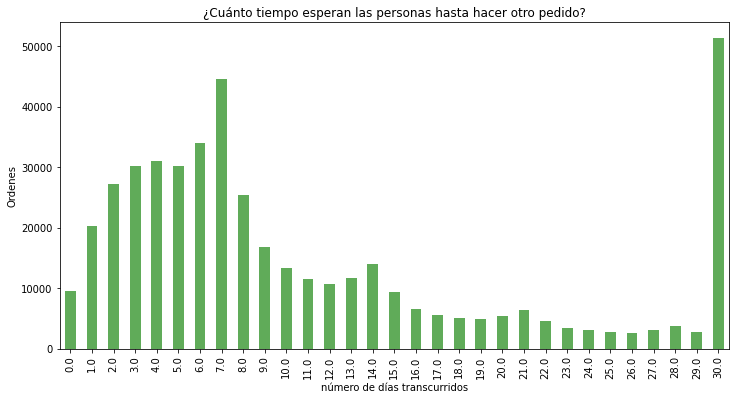

In [46]:
# Uso groupby() para contar las ordenes según los dias transcurridos

order_time = df_orders.groupby(by='days_since_prior_order')['order_id'].count()

# Crero una grafica de barras de ordenes según tiempo transcurridos, y defino sus argumentos:

order_time.plot(kind='bar', 
                title= "¿Cuánto tiempo esperan las personas hasta hacer otro pedido?",
                figsize=(12,6),
                xlabel = "número de días transcurridos",
                ylabel = "Ordenes",
                color = "#60ab59",
               )
plt.show()

**Escribe aquí tus conclusiones**

1) **La mayoría de ordenes** ocurren **30 dias después de la última compra** esto puede estar explicado por que los usuarios hacen las compras en la app de manera mensual. 

2) También es importante notar que **cada 7 dias las compras aumentan**, lo cual nos indica que muchas compras siguen un comportamiento semanal.

3) **Después del dia 9 y hasta el dia 29** las personas **disminuyen su frecuencia de compras**: siendo del dia 26 el de menos compras.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Todo correcto en esta sección `A`.
</div>

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

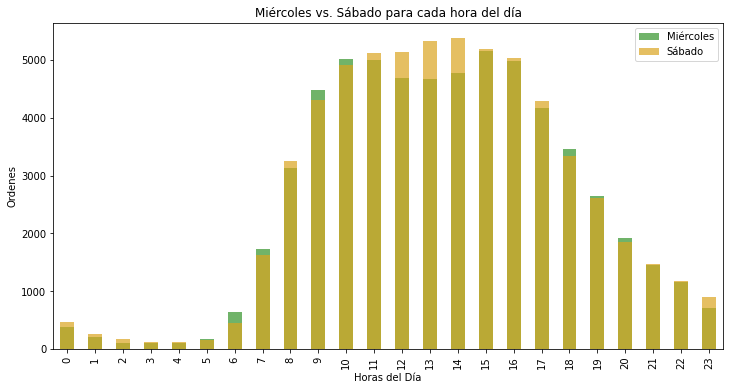

In [47]:
# Utilizo un filtro para obtener los valores de los miércoles
wed_orders = df_orders[df_orders['order_dow']==3]
wed_bar = wed_orders.groupby(by='order_hour_of_day')['order_id'].count() # total ordenes por hora

# Utilizo un filtro para obtener los valores de los sabados
sat_orders = df_orders[df_orders['order_dow']==6]
sat_bar = sat_orders.groupby(by='order_hour_of_day')['order_id'].count() # total ordenes por hora


wed_bar.plot(kind='bar',                            # creo una gráfica de barras para miércoles          # defino los p
                color = "#60ab59",                  # defino parámetros deseados
                alpha = 0.9
            )


sat_bar.plot(kind='bar',                            # creo una gráfica de barras para sábado
                xlabel = "Horas del Día",           # defino parámetros deseados
                ylabel = "Ordenes",
                color = 'goldenrod',
                alpha = 0.7,
                figsize=(12,6)
            )


plt.title("Miércoles vs. Sábado para cada hora del día")    # asigno un título a la grafica
plt.legend(["Miércoles", "Sábado"])                         # agrego una legenda a la grafica
plt.show()

**Escribe aquí tus conclusiones**

1) Los **sábados entre las 12:00 a 14:00, se realizan más órdenes** que los miércoles.

2) La grafica muestra una tendencia similar en horarios de la mañana y de la tarde, en los cuales no se evidencia una diferencia significativa del número de órdenes.


### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

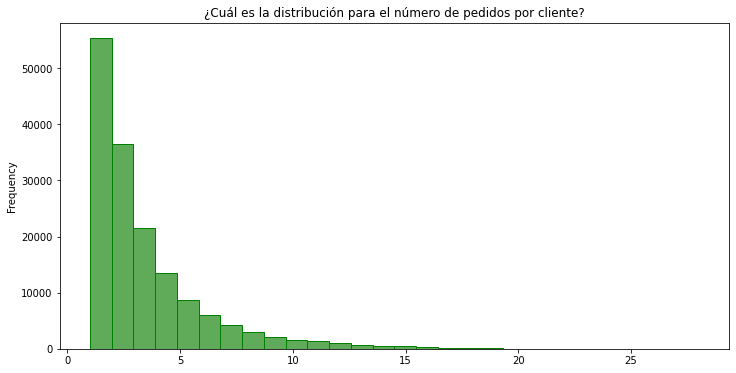

In [48]:
# creo order_per_client con el numero de pedidos por cliente, uso .value_counts()
order_per_client= df_orders['user_id'].value_counts()

# creo un histograma para order_per_client
order_per_client.plot(kind='hist',
                      bins = 28,
                      xlabel = "número de pedidos",
                      ylabel = "Ordenes",
                      title ='¿Cuál es la distribución para el número de pedidos por cliente?',
                      figsize=(12,6),
                      color = "#60ab59",
                      edgecolor='green'
                      
            )
plt.show()

**Escribe aquí tus conclusiones**

1. La mayoría de los usuarios compra **entre 1 y 5 productos.**
2. Algunos usuarios compran entre 5 y 10 productos.
3. **Luego de 10 productos** las ordenes son cada vez menores.



### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [49]:
# creo prod_id_and_name para unir las tablas de ordered products con products.
prod_id_and_name = df_order_products.merge(df_products, on = 'product_id') # uso merge con Prod_id.

# creo top_20 para almacenar las columnas que necesito.
top_20 = prod_id_and_name[['product_id','product_name','order_id']]

# agrupo por product_id y name las ordenes. luego uso count, sort_values, head(20) y reset_index.
top_20 = top_20.groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending = False).head(20).reset_index()
top_20

,product_id,product_name,order_id
0,24852,Banana,66050
1,13176,Bag of Organic Bananas,53297
2,21137,Organic Strawberries,37039
3,21903,Organic Baby Spinach,33971
4,47209,Organic Hass Avocado,29773
5,47766,Organic Avocado,24689
6,47626,Large Lemon,21495
7,16797,Strawberries,20018
8,26209,Limes,19690
9,27845,Organic Whole Milk,19600


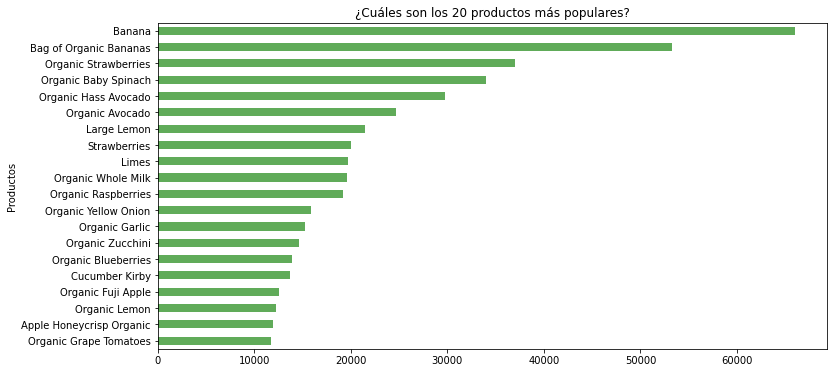

In [50]:
# creo top_20_bar sin el id de producto para la grafica.
top_20_bar = prod_id_and_name.groupby(['product_name'])['order_id'].count().sort_values(ascending = False).head(20)

# creo un grafico de barras para top_20_bar.
top_20_bar.plot(kind='barh',
            xlabel = "Productos",
            ylabel = "Ordenes",
            title ='¿Cuáles son los 20 productos más populares?',
            figsize=(12,6),
            color = "#60ab59"
           )

plt.gca().invert_yaxis()
plt.show()

**Escribe aquí tus conclusiones**
1. Los productos más populares son las **Bananas y la bolsa de Bananas orgánicas**. Representan el 25% de las ventas de los productos más populares.

2. El **top 5 de productos representa el 47%** de los productos más populares.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Sin errores en esta sección `B`.
</div>

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [51]:
# creo top_5 para saber qué #de artículos se pide con mayor frecuencia.
Top_5 = df_order_products.groupby('order_id')['product_id'].count().sort_values().reset_index()

# uso count, sort_values y head para solo mostrar 5 #de artículos más repetidos.
Top_5 =Top_5.groupby('product_id')['order_id'].count().sort_values(ascending= False).head(5)

# creo un data frame para ver los datos mejor.
pd.DataFrame({'products_in_order':Top_5.index, 'total_orders':Top_5.values})

,products_in_order,total_orders
0,5,31923
1,6,31698
2,4,31054
3,7,30822
4,3,29046


<AxesSubplot:title={'center':'¿Cuántos artículos compran normalmente las personas en un pedido?'}, ylabel='Frequency'>

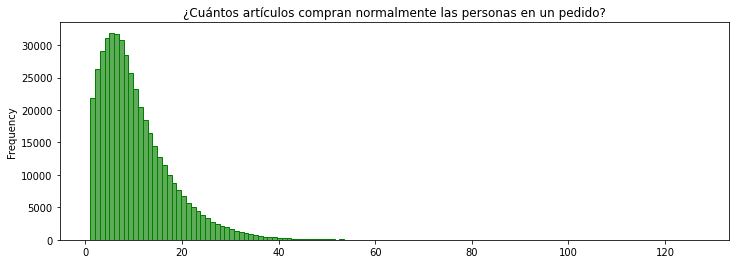

In [52]:
# creo prod_per_order, agrupo por order_id y cuento los valores en product_id.
prod_per_order = df_order_products.groupby('order_id')['product_id'].count()

# creo un histograma para artículos por pedido.
prod_per_order.plot(kind='hist',
                      bins = 127,
                      xlabel = "# número de productos por Orden",
                      ylabel = "Ordenes",
                      title ='¿Cuántos artículos compran normalmente las personas en un pedido?',
                      figsize=(12,4),
                      color = "#60ab59",
                      edgecolor='green'
                   )


In [53]:
prod_per_order.describe()

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64

In [54]:
print(prod_per_order.mode())

0    5
dtype: int64


1. Las personas compran normalmente entre 3 y 7 artículos, siendo **5 artículos la cantidad más común.** 

2. El promedio de artículos por orden es de 10, pero eso puede estar influenciado por los valores extremos, así que podemos guiarnos por la mediana que es **8 artículos por orden.**

3. Luego de los 5 artículos: por cada articulo agregado disminuyen las ordenes.


### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [55]:
#creo prod_per_reorder para guardar solo los pedidos que se vuelven a pedir.
#uso la tabla prod_id_and_name que cree con merge en pasos anteriores.

prod_per_reorder = prod_id_and_name[prod_id_and_name['reordered'] ==1]

#uso groupby en las columnas Id y Name, y cuento las orders_ID, ordeno con sort y uso head para 20 valores.
prod_per_reorder.groupby(['product_id','product_name'])['order_id'].count().sort_values(ascending = False).head(20)


product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
Name: order_id, dtype: int64

1. Los productos que más se vuelven a pedir son **Bananas y la bolsa de Bananas orgánicas**, también muchos de estos productos se relacionan con nuestro análisis de los productos más populares.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [56]:
# uso la tabla que cree en pasos anteriores, agrupo por producto ID y uso mean() en la columna 'reordered'

prod_id_and_name.groupby(['product_id','product_name'])['reordered'].mean()


product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           0.564286
2           All-Seasons Salt                                                     0.000000
3           Robust Golden Unsweetened Oolong Tea                                 0.738095
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce    0.510204
7           Pure Coconut Water With Orange                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

1. Aquí tenemos el porcentaje en el que se vuelve a pedir cada producto de la app

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [57]:
# creo orders merged para unir la tabla de df_order_products con df_orders, uso merge en 'order_id'.

order_merged = df_order_products.merge(df_orders, on = 'order_id')
order_merged.head(3)                                                    #muestro la nueva tabla. 

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2141543,11440,17,0,58454,25,0,15,8.0
1,2141543,31869,15,1,58454,25,0,15,8.0
2,2141543,30233,9,1,58454,25,0,15,8.0


In [58]:
# en la nueva tabla uso groupby en 'user_id', y en la columna de 'reordered' uso el método mean()
order_merged.groupby('user_id')['reordered'].mean()


user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

1. Aquí tenemos el porcentaje de recompra para cada usuario de la app

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [59]:
#uso columns para recordar los nombres de la tabla que creamos con merge anteriormente.
prod_id_and_name.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id'],
      dtype='object')

In [60]:
#creo first_20 para filtrar los productos donde 'add_to_cart_order' es 1 (primer artículo)

first_20 = prod_id_and_name[prod_id_and_name['add_to_cart_order']==1]

#uso groupby product name, y uso count para la columna 'add_to_cart_order', ordenos los valores y uso head()
first_20 = first_20.groupby('product_name')['add_to_cart_order'].count().sort_values(ascending=False).head(20)

#creo un data frame
first_20_table = pd.DataFrame({'product_name':first_20.index, '1st added times':first_20.values})

#muestro el data frame
first_20_table

,product_name,1st added times
0,Banana,15562
1,Bag of Organic Bananas,11026
2,Organic Whole Milk,4363
3,Organic Strawberries,3946
4,Organic Hass Avocado,3390
5,Organic Baby Spinach,3336
6,Organic Avocado,3044
7,Spring Water,2336
8,Strawberries,2308
9,Organic Raspberries,2024


1. **Las bananas y bolsa de bananas orgánicas** son los primeros productos en ser añadidos a las órdenes.
2. **El top 5 representa el 62% de los 20 productos** que se agregan primero a las órdenes.

### Conclusion general del proyecto:

En este proyecto se analizaron diferentes preguntas las cuales se resumen a continuación: 

**Sección A:**

1. Para cada hora del día, ¿cuántas personas hacen órdenes? Las personas **compran más durante las 9:00 y las 17:00**
2. ¿Qué día de la semana compran víveres las personas? **los domingos y lunes**
3. ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? **30 dias seguido por 7 dias**


**Sección B:**
1. ¿Diferencia entre miércoles y sábados para ordenes por hora? **los sábados entre las 12:00 a 14:00, se realizan más ordenes**

2. ¿Cuál es la distribución para el número de pedidos por cliente? **La mayoría de los usuarios compra entre 1 y 5 productos.**

3. ¿Cuáles son los 20 productos más populares (muestra su ID y nombre): Esta liderada por **Banana, Bag of Organic Bananas, Organic Strawberries, Organic Baby Spinach, Organic Hass Avocado..ect** (detalles en sección B3)


**Sección C:**
1. ¿Cuántos artículos compran normalmente las personas en un pedido? **5 artículos es la cantidad más común.**

2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia? **Bananas y la bolsa de Bananas orgánicas** son los más pedidos (detalles en C2)

3. Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir? (detalles en sección C3)

4. Para cada cliente, ¿qué proporción de sus productos ya los había pedido? (detalles en sección C4)
5. ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos? **Las bananas y bolsa de bananas orgánicas son los primeros productos**





<div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>